# Revisão do artigo “Model-independent quantum phases classifier”

In [2]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


## Modelos Físicos

Foram usados os hamiltonianos a seguir

- cadeias XXZ com anisotropia de ion uniaxial ($H_1$), dado por:

$$\mathcal{H_1} = \sum^N_{l=1}[J(S_l^xS_{l+1}^x + S^y_lS^y_{l+1}) + J_zS_l^zS_{l+1}^z] + D \sum^N_{l=1}S_l^{z2} $$

Onde $S_l$ é o operador spin-1 agindo sobre o sítio $l$ de uma cadeia de $N$ sítios. D representa a anisotropia de ion único e $J=1, J_z$ são os acoplamentos entre os spins. O diagrama de fase desse sistema contém: Haldane, Large D, XY1, XY2, Ferromagnético e Néel.

- cadeia de vínculo alternante XXZ ($H_2$). O Hamiltoniano é dado por: 

$$\mathcal{H_2} = \sum^N_{l=1}\left[1-\delta(-1)^l\right](S_l^xS_{l+1}^x + S^y_lS^y_{l+1} + \Delta S_l^zS_{l+1}^z) $$

Aqui, $\Delta$ representa a força a anisotropia de Ising da interação spin órbita no material magnético. Já  o termo $\delta$ representa o vínculo alternante que descreve dimerização.

Tal sistema apresenta fase ferromagnéica, XX1, Néel, Haldane e Dimerizada.

- Cadeia biquadrática linear ($H_3$), dada por

$$\mathcal{H_2} = \sum^N_{l=1}[\cos \theta (S_l S_{l+1}) + \sin\theta (S_l S_{l+1})]$$

com $\theta \in [0,2\pi)$ representa o vínculo entre vizinhos. Esse modelo apresenta Haldane, Trimerizado, Ferromagnético e Dimerizado.

### Implementação do modelos

Os modelos foram implementados no arquivo `hamiltonians.py`, usando POO. Os modelos são construídos baseados em uma classe `Hamiltonian`.

In [3]:
import hamiltonians

### Parâmetros dos modelos:

Os parâmetros utilizados no modelo estão a seguir

In [4]:
H_1_parameters = np.arange(-4, 4, 0.1)
Jzs, Ds = H_1_parameters, H_1_parameters

# H2 parameters

# I'm pretty sure that the original article
# is wrong here.

#
Deltas = np.arange(0, 1, 0.05)
deltas = np.arange(-1.5,2.5, 0.0125)

# H3 parameters
thetas = np.arange(0,2*np.pi,0.001*np.pi)

## Correladores

Os modelos foram implementados no arquivo `correlators.py`, usando POO. A ideia de deixar separado do hamiltoniano é para não precisarmos inicializar os correladores caso não queiramos mudar o número de spin.

In [4]:
import correlators

## Coleta de dados

### H1

In [5]:
N = 4
n_sup = int(N/2+1)

with open(f"data/H1/N={N}.csv", 'w') as fh:
    fh.write("Jz, D, " + ", ".join([f"S1S{i}{j}" for i in range(1, n_sup+1) for j in ['x', 'y', 'z']]) + ", "+
    ", ".join([f"prodSi{j}" for j in ['x', 'y', 'z']]))

    corr = correlators.Correlators(N)


    for Jz in Jzs:
        for D in Ds:
            line = [Jz, D]
            H1 = hamiltonians.XXZUniaxialSingleIonAnisotropy(N, Jz, D)
            gstate = H1.gstate 
            gstate_dagg = np.conj(gstate).T
            for i in range(n_sup):
                line.append(np.real(gstate_dagg @ corr.S1Six(i) @ gstate))
                line.append(np.real(gstate_dagg @ corr.S1Siy(i) @ gstate))
                line.append(np.real(gstate_dagg @ corr.S1Siz(i) @ gstate))
            
            line.append(np.real(gstate_dagg @ corr.prodSix @ gstate))
            line.append(np.real(gstate_dagg @ corr.prodSiy @ gstate))
            line.append(np.real(gstate_dagg @ corr.prodSiz @ gstate))

            fh.write("\n"+", ".join([str(i) for i in line]))


### H2

In [15]:

N = 4
n_sup = int(N/2+1)

with open(f"data/H2/N={N}.csv", 'w') as fh:
    fh.write("Delta, delta, " + ", ".join([f"S1S{i}{j}" for i in range(1, n_sup+1) for j in ['x', 'y', 'z']]) + ", "+
    ", ".join([f"prodSi{j}" for j in ['x', 'y', 'z']]))

    corr = correlators.Correlators(N)

    for Delta in Deltas:
        for delta in deltas:
            line = [Delta, delta]
            H2 = hamiltonians.BondAlternatingXXZ(N, Delta, delta)
            gstate = H2.gstate 
            gstate_dagg = np.conj(gstate).T
            for i in range(n_sup):
                line.append(np.real(gstate_dagg @ corr.S1Six(i) @ gstate))
                line.append(np.real(gstate_dagg @ corr.S1Siy(i) @ gstate))
                line.append(np.real(gstate_dagg @ corr.S1Siz(i) @ gstate))
            
            line.append(np.real(gstate_dagg @ corr.prodSix @ gstate))
            line.append(np.real(gstate_dagg @ corr.prodSiy @ gstate))
            line.append(np.real(gstate_dagg @ corr.prodSiz @ gstate))

            fh.write("\n"+", ".join([str(i) for i in line]))

## H3

In [ ]:
N = 12
n_sup = int(N/2+1)

with open(f"data/H3/N={N}.csv", 'w') as fh:
    fh.write("theta, " + ", ".join([f"S1S{i}{j}" for i in range(1, n_sup+1) for j in ['x', 'y', 'z']]) + ", "+
    ", ".join([f"prodSi{j}" for j in ['x', 'y', 'z']]))

    corr = correlators.Correlators(N)

    for theta in thetas:
        line = [theta]
        H3 = hamiltonians.BilinearBiquadratic(N, theta)
        gstate = H3.gstate 
        gstate_dagg = np.conj(gstate).T
        for i in range(n_sup):
            line.append(np.real(gstate_dagg @ corr.S1Six(i) @ gstate))
            line.append(np.real(gstate_dagg @ corr.S1Siy(i) @ gstate))
            line.append(np.real(gstate_dagg @ corr.S1Siz(i) @ gstate))
            
        line.append(np.real(gstate_dagg @ corr.prodSix @ gstate))
        line.append(np.real(gstate_dagg @ corr.prodSiy @ gstate))
        line.append(np.real(gstate_dagg @ corr.prodSiz @ gstate))
    
        fh.write("\n"+", ".join([str(i) for i in line]))

## ML Phase Classifier

### We need to assign the labels to each value

Thanks to Mahlow for that

In [6]:
phases = ['Haldane', 'Trimer', 'Ferro', 'Dimer',
          'LD', 'XY1', 'Neel', 'XY2']
colors = ['red', 'purple', 'blue', 'green', 'yellow',
           'cyan', 'olive', 'black']

phase_color = {phases[i]: colors[i] for i in range(len(phases))}

In [ ]:
df_H1_theorical = pd.read_csv('data/theoricals/XXZ.csv', header=None)
df_H2_theorical = pd.read_csv('data/theoricals/bond-alternating.csv', header=None)
df_H3_theorical = pd.DataFrame([0.25, 0.5, 1.25, 1.75])

In [7]:
def assign_labels(dfs_corr: dict[str, pd.DataFrame]):
    phases = ['Haldane', 'Trimer', 'Ferro', 'Dimer',
          'LD', 'XY1', 'Neel', 'XY2']
    
    # labels XXZ correlations
    H1_labels = []
    for i in range(0, len(dfs_corr['H1'])):
        x = dfs_corr['H1'].values[i, 0]
        y = dfs_corr['H1'].values[i, 1]

        # Ferro/LD phases
        if x < -1.8375250:
            if y < (-0.1009)*(x**2) - 1.6701*x - 1.329:
                H1_labels.append(2)
            else:
                H1_labels.append(4)

        # Ferro/XY phases
        elif x >= -1.837525 and x < -0.278:
            if y >-0.0741*x**3 - 0.3014*x**2 - 0.872*x + 0.3499:
                H1_labels.append(4)
            elif y < -5.1127*x**5 - 27.865*x**4 - 57.426*x**3 - 55.858*x**2 - 27.638*x - 6.4824:
                H1_labels.append(2)
            else:
                H1_labels.append(5)

        elif x >= -0.278 and x < 0:
            if y >-0.0741*x**3 - 0.3014*x**2 - 0.872*x + 0.3499:
                H1_labels.append(4)
            elif y < -5.1127*x**5 - 27.865*x**4 - 57.426*x**3 - 55.858*x**2 - 27.638*x - 6.4824:
                H1_labels.append(2)
            elif y < 4.595*x**2 + 1.393*x - 2.007:
                H1_labels.append(7)
            else:
                H1_labels.append(5)

        # LD/Haldane phases
        elif x >= 0 and x < 3.28405:
            if y > 0.0807*x**2 + 0.5418*x + 0.3465:
                H1_labels.append(4)
            elif y > -0.0462*x**3 + 0.154*x**2 + 1.5213*x - 2.0196:
                H1_labels.append(0)
            else:
                H1_labels.append(6)

        # LD/Neel phases
        elif x >= 3.28405 and x <= 4:
            if y > 1.0906*x - 0.583:
                H1_labels.append(4)
            else:
                H1_labels.append(6)

    dfs_corr['H1']["labels"]= [phases[i] for i in H1_labels]
    
    ######################################################################
    # labels Bond correlations
    H2_labels = []
    for i in range(0, len(dfs_corr['H2'])):
        x = dfs_corr['H2'].values[i, 1]
        y = dfs_corr['H2'].values[i, 0]
        

        # Ferro phases
        if x < -1:
            H2_labels.append(2)

        # XY/Dimer phases
        elif x >= -1 and x < 0:
            if y > 0.1435*x**2 - 0.6447*x + 0.2197:
                H2_labels.append(3)
            else:
                H2_labels.append(5)

        # HALDANE/DIMER
        elif x >= 0 and x < 1:
            if y > 0.0043*x**3 - 0.0384*x**2 + 0.0631*x + 0.2317:
                H2_labels.append(3)
            else:
                H2_labels.append(0)   

        # Haldane/Neel phases
        elif x >= 1.0 and x <= 1.2:
            if y > -0.0872*x**2 + 0.6067*x - 0.2264:
                H2_labels.append(3)
            elif y > -247.1*x**3 + 826.12*x**2 - 921.85*x + 343.48:
                H2_labels.append(6)
            else:
                H2_labels.append(0)

        # Neel/Dimmer phases
        elif x > 1.2 and x <= 2.5:
            if y > -0.0872*x**2 + 0.6067*x - 0.2264:
                H2_labels.append(3)
            else:
                H2_labels.append(6)

    dfs_corr['H2']["labels"]= [phases[i] for i in H2_labels]

    ######################################################################
    # Labels bilinear
    H3_labels = []
    
    for i in range(0, len(dfs_corr['H3'])):
        # Haldane phases
        if dfs_corr['H3'].values[i,0] <= 0.25*np.pi and dfs_corr['H3'].values[i,0] >= 0 or dfs_corr['H3'].values[i,0] > 1.75*np.pi and dfs_corr['H3'].values[i,0] <= 2*np.pi:
            H3_labels.append(0)
        # Trimer phases
        elif dfs_corr['H3'].values[i,0] > 0.25*np.pi and dfs_corr['H3'].values[i,0] <= 0.5*np.pi:
            H3_labels.append(1)
        # Ferro phases
        elif dfs_corr['H3'].values[i,0] > 0.5*np.pi and dfs_corr['H3'].values[i,0] <= 1.25*np.pi:
            H3_labels.append(2)
        # Dimer phases
        else:
            H3_labels.append(3)

    dfs_corr['H3']["labels"]= [phases[i] for i in H3_labels]
    

In [30]:
def read_correlations(N: int) -> dict[str, pd.DataFrame]:
    dfs_corr = {
    }
    for i in range(1,4):
        dfs_corr[f'H{i}'] = pd.read_csv(f'data/H{i}/N={N}.csv')
    
    assign_labels(dfs_corr)
    
    # Normalization, if done, must happen AFTER this point

    return dfs_corr

dfs_corr = read_correlations(8)

In [9]:
dfs_corr['H1']

,Jz,D,S1S1x,S1S1y,S1S1z,S1S2x,S1S2y,S1S2z,S1S3x,S1S3y,S1S3z,prodSix,prodSiy,prodSiz,labels
0,-4.0,-4.0,0.500000,0.500000,1.000000,-3.553619e-17,3.553619e-17,1.000000,6.636423e-17,-6.636423e-17,1.000000,-9.175450e-18,-9.175450e-18,1.000000,Ferro
1,-4.0,-3.9,0.500000,0.500000,1.000000,-1.462253e-17,1.462253e-17,1.000000,3.897036e-17,-3.897036e-17,1.000000,-9.651938e-17,-9.651938e-17,1.000000,Ferro
2,-4.0,-3.8,0.500000,0.500000,1.000000,1.229477e-17,-1.229477e-17,1.000000,1.527102e-17,-1.527102e-17,1.000000,-1.411454e-17,-1.411454e-17,1.000000,Ferro
3,-4.0,-3.7,0.500000,0.500000,1.000000,1.075058e-17,-1.075058e-17,1.000000,1.347868e-17,-1.347868e-17,1.000000,-8.543744e-18,-8.543744e-18,1.000000,Ferro
4,-4.0,-3.6,0.500000,0.500000,1.000000,1.326937e-19,-1.326937e-19,1.000000,-3.951789e-18,3.951789e-18,1.000000,2.164962e-17,2.164962e-17,1.000000,Ferro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,3.9,3.5,0.684722,0.684722,0.630556,2.090971e-01,2.090971e-01,0.471771,-4.147340e-01,-4.147340e-01,-0.551163,3.982070e-01,3.982070e-01,0.485980,Neel
6396,3.9,3.6,0.715222,0.715222,0.569556,2.264202e-01,2.264202e-01,0.402361,-4.335926e-01,-4.335926e-01,-0.485959,4.155929e-01,4.155929e-01,0.417330,Neel
6397,3.9,3.7,0.746853,0.746853,0.506294,2.406831e-01,2.406831e-01,0.333550,-4.469086e-01,-4.469086e-01,-0.419922,4.243270e-01,4.243270e-01,0.348969,LD
6398,3.9,3.8,0.777747,0.777747,0.444506,2.507266e-01,2.507266e-01,0.269557,-4.537062e-01,-4.537062e-01,-0.357031,4.236593e-01,4.236593e-01,0.285070,LD


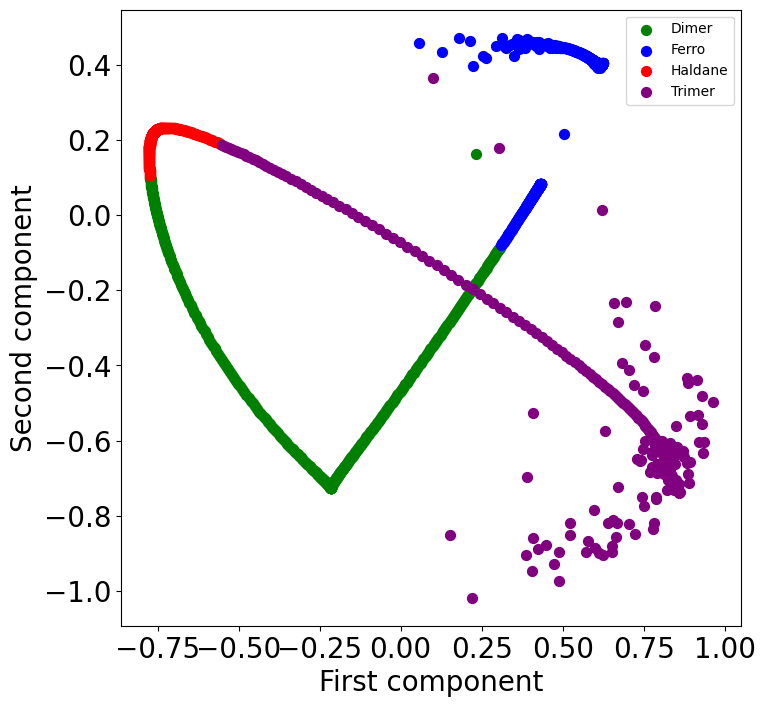

In [37]:
def PCA_transform(df):
    pca = PCA(2)

    X_train = df.values[:,4:-1]
    X_train = Normalizer().fit_transform(X_train)
    y_train = df.values[:,-1]


    pca_result = pca.fit_transform(X_train)
    classes = np.unique(y_train)
    plt.figure(figsize=(8,8))
    for c in classes:
        nodes = np.where(y_train == c)
        plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = phase_color[c], 
                    label = c)
    plt.legend()
    plt.xlabel("First component", fontsize=20)
    plt.ylabel("Second component", fontsize=20)
    plt.xticks(color='k', size=20)
    plt.yticks(color='k', size=20)
    plt.show()
PCA_transform(dfs_corr['H3'])


## Using KNN to classify the quantum phases


In [ ]:
def classify(dfs_corr: dict[str, pd.DataFrame], test_key: str, ignored_phases: list[str] = []):
    train_keys = list(dfs_corr.keys())
    train_keys.remove(test_key)
 
    
    # Gets used in the KNN
    start_pos = {
        'H1': 2,
        'H2': 2,
        'H3': 2
    }
    X = None
    y = None
    for key in train_keys:
        df_key = dfs_corr[key] 
        X_key = Normalizer().fit_transform(df_key.values[:,start_pos[key]:-1])
        y_key = df_key.values[:,-1]
        
        if (X is None): X = X_key;
        else: X = np.vstack((X,X_key))
        if (y is None): y = y_key;
        else: y = np.hstack((y,y_key))

    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

    # Gets X_prev and Y prev
    df_prev = dfs_corr[test_key][
        ~dfs_corr[test_key]['labels'].isin(ignored_phases)
        ]


    X_prev = Normalizer().fit_transform(df_prev.values[:,start_pos[test_key]:-1])
    y_prev = df_prev.values[:,-1]


    knn = KNeighborsClassifier(n_neighbors=50)
    knn.fit(X_train, y_train)
    print(knn.score(X_prev, y_prev))


In [ ]:
classify(dfs_corr,'H3')

0.7754921477549215
